# 📞 Telco Customer Churn — Exploración y Preparación de Datos (EDA)

Este notebook realiza un **Análisis Exploratorio de Datos (EDA)** para entender los factores asociados a la cancelación de clientes en una empresa de telecomunicaciones.

**Objetivo:** Limpiar, analizar y enriquecer el dataset para construir posteriormente modelos de Machine Learning que predigan el churn.

**Fuente de datos:** [Telco Customer Churn — Kaggle](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)



# 1️⃣ Importar librerías 📚

In [4]:
#  Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:

# Configuraciones generales de estilo
sns.set_theme(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# 2️⃣ Cargar datos y Exploración Básica del Dataset 📂🔍 

Se inspecciona la estructura del dataset, tipos de datos, valores faltantes y una muestra de registros.

In [6]:
#  Cargar datos originales
df = pd.read_csv('../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [7]:
# Resumen de estructura
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
# Vista rápida de los primeros registros
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
# Estadísticas descriptivas de columnas numéricas
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
# Conteo de valores nulos por columna
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# 3️⃣ Limpieza de datos 🧹

-  Se elimina la columna `customerID` (no aporta valor predictivo).
-  Se convierte `TotalCharges` de texto a numérico.
-  Se eliminan registros con `TotalCharges` nulo.
-  Se eliminan duplicados si existen.

## ⚠️ Nota sobre `TotalCharges` y valores nulos

Al cargar el dataset original, la columna `TotalCharges` se interpreta como `object` (texto). 
Esto sucede porque algunas celdas están vacías o contienen espacios en blanco, los cuales **Pandas no reconoce como `NaN`**, sino como strings vacíos (`''`).

Por esta razón, al inspeccionar valores nulos con `df.isnull().sum()`, inicialmente parece que `TotalCharges` no tiene valores faltantes.

Para trabajar correctamente con esta columna:
- Se convierte a tipo numérico con `pd.to_numeric()`. 
- Los strings vacíos o no convertibles se reemplazan automáticamente por `NaN` usando `errors='coerce'`.
- Después de la conversión, se detectan efectivamente **11 registros nulos**, que se eliminan para asegurar la consistencia de los datos.

Este paso es fundamental para evitar errores en análisis numéricos y modelado posterior.


In [11]:
# Eliminar columna customerID
df.drop('customerID', axis=1, inplace=True)

In [12]:
# Convertir TotalCharges a numérico y manejar errores
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [13]:
# Verificar NaN generados y eliminarlos
print("Valores nulos en TotalCharges:", df['TotalCharges'].isnull().sum())
df = df.dropna(subset=['TotalCharges'])

Valores nulos en TotalCharges: 11


In [14]:
# Eliminar duplicados si existen
print("Duplicados:", df.duplicated().sum())
df = df.drop_duplicates()

Duplicados: 22


# 4️⃣ 📊 Análisis Visual Exploratorio

Gráficas básicas para entender la distribución de variables numéricas y la variable objetivo `Churn`.

# 📊 Gráfico: Distribución de tenure 

📌 ¿Qué es tenure?
En este contexto, tenure representa el tiempo (en meses) que un cliente ha permanecido con la empresa de telecomunicaciones.

Valor bajo (cerca de 0) → clientes nuevos.

Valor alto (hasta 72) → clientes antiguos o fieles.

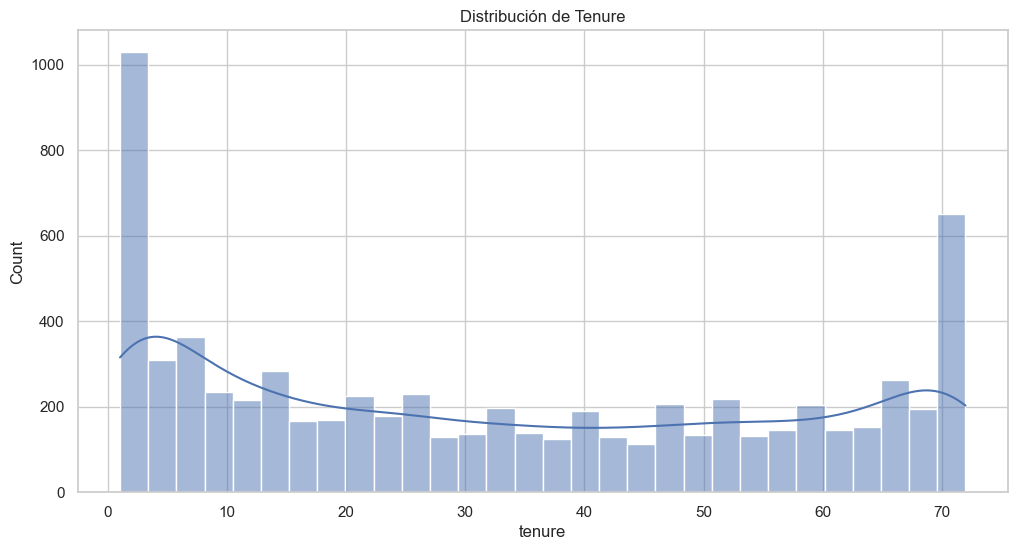

In [15]:
# Distribución de tenure
sns.histplot(df['tenure'], bins=30, kde=True)
plt.title('Distribución de Tenure')
plt.show()

📊 ¿Qué nos dice este gráfico?
Pico inicial (0-5 meses):

Hay más de 1000 clientes que han estado menos de 5 meses con la empresa.

👉 Esto indica un alto número de clientes nuevos o que se dieron de baja rápidamente, lo cual puede relacionarse con churn (cancelación temprana).

Distribución dispersa en la mitad (10-60 meses):

Menor concentración de clientes.

Muestra una clientela estable pero no tan numerosa.

Segundo pico hacia el final (~72 meses):

Hay muchos clientes con 6 años (72 meses) de antigüedad.

👉 Indica una base de clientes muy leales o antiguos.

# 📊 Gráfico: Distribución de MonthlyCharges (Cargos Mensuales)

Este histograma muestra cómo se distribuyen los montos que los clientes pagan mensualmente por los servicios de telecomunicaciones.

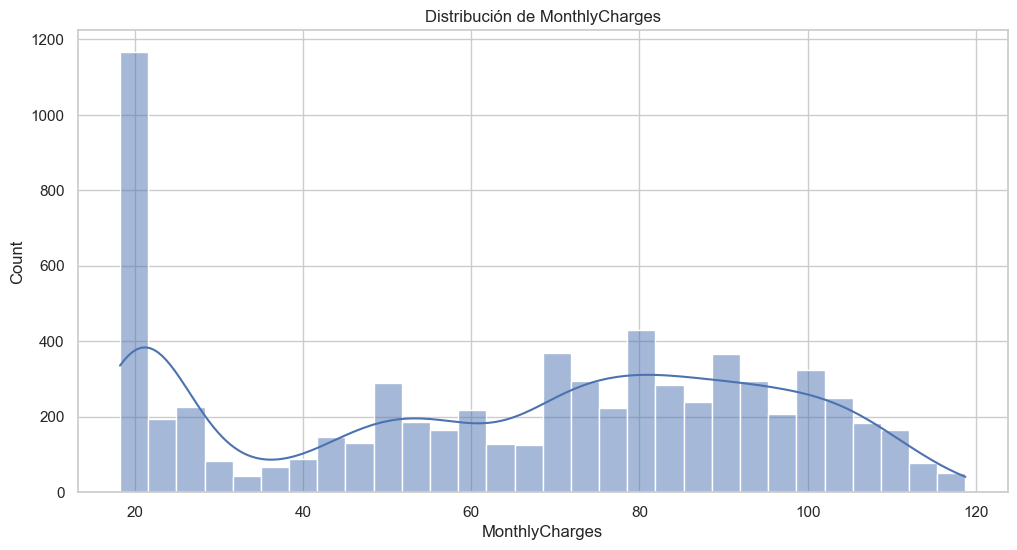

In [16]:
# Distribución de MonthlyCharges
sns.histplot(df['MonthlyCharges'], bins=30, kde=True)
plt.title('Distribución de MonthlyCharges')
plt.show()

📌 ¿Qué es MonthlyCharges?
Es una variable numérica continua.

Representa el monto mensual que un cliente paga por sus servicios contratados.

Valores bajos → planes básicos o con menos servicios.

Valores altos → planes premium o con múltiples servicios adicionales.

📈 Análisis del Gráfico

🔹 1. Pico inicial (alrededor de los 20 dólares):

La barra más alta se encuentra cerca de los 18-20 USD.

Indica que más de 1.000 clientes están pagando un monto mensual bajo.

➤ Esto puede estar asociado a planes básicos, personas mayores, o usuarios que usan servicios mínimos.

🔹 2. Distribución heterogénea desde 30 hasta 100+:

Desde los 30 hasta los 100 USD, la distribución se vuelve más dispersa.

Hay una presencia notable de clientes que pagan entre 70 y 100 USD.

➤ Puede representar clientes con varios servicios contratados, como internet + streaming + telefonía.

🔹 3. Ligeras concentraciones intermedias:

Se observan pequeños picos alrededor de los 50–60 USD y 80 USD.

Muestra que algunos planes tienen precios estándar donde se acumulan varios usuarios.

🔹 4. Caída hacia los 120 USD:

Hay muy pocos clientes que pagan más de 110 USD mensualmente.

➤ Estos pueden ser casos de planes corporativos o usuarios con todos los servicios disponibles.

🎯 ¿Por qué es importante este gráfico?
Nos ayuda a entender el comportamiento económico de los clientes.

Posibles relaciones con Churn:

Clientes con cargos muy bajos → podrían no tener servicios atractivos y abandonar fácilmente.

Clientes con cargos muy altos → podrían cancelar por considerar el servicio demasiado costoso.

# 📊 Gráfico: Distribución de Clases Churn
Este gráfico representa la cantidad de clientes que cancelaron (churn) y los que permanecieron activos.



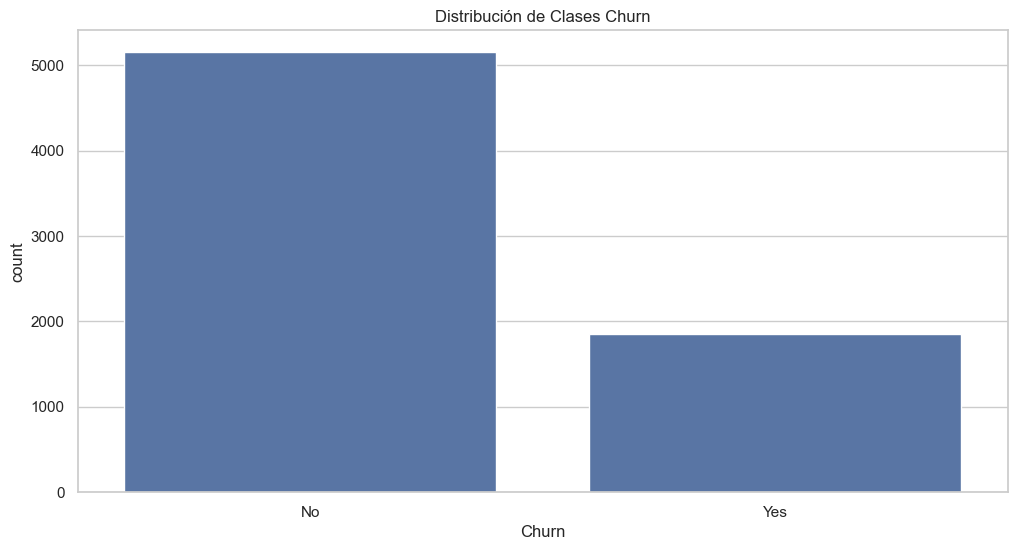

In [17]:
# Balance de clases Churn
sns.countplot(x='Churn', data=df)
plt.title('Distribución de Clases Churn')
plt.show()

📌 ¿Qué es Churn?

Churn es la variable objetivo en este problema de clasificación.

Representa si un cliente abandonó (Yes) o permaneció (No) en la compañía.

"Yes" → Cliente canceló el servicio.

"No" → Cliente sigue siendo cliente activo.

📈 Interpretación del Gráfico

🔹 Clase “No” (Clientes Activos)

Representa a los clientes que no han cancelado el servicio.

Aproximadamente 5.200 registros.

Esta clase es mayoritaria, indicando que la mayoría de los clientes sigue usando el servicio.

🔹 Clase “Yes” (Clientes que Cancelaron)

Representa a los clientes que sí han cancelado.

Aproximadamente 1.800 registros.

Es la clase minoritaria en el conjunto de datos.

# 5️⃣  Enriquecimiento de Datos (Feature Engineering) 💡

Se generan nuevas variables útiles para mejorar el modelado:
- `AvgCharges`: Promedio de cargo mensual.
- `TenureGroup`: Agrupación de antigüedad.
- `HasPhoneService`: Binario.
- `MultipleLinesBinary`: Binario.
- `TotalServices`: Total de servicios contratados.

In [18]:
# Promedio de cargo mensual (evitar división por cero)
df['AvgCharges'] = df['TotalCharges'] / df['tenure']
df['AvgCharges'] = df['AvgCharges'].replace([np.inf], 0).fillna(0)

In [19]:
# Agrupar tenure en rangos
bins = [0, 12, 24, 48, 60, np.inf]
labels = ['0–12', '12–24', '24–48', '48–60', '60+']
df['TenureGroup'] = pd.cut(df['tenure'], bins=bins, labels=labels)

In [20]:
# HasPhoneService binario
df['HasPhoneService'] = df['PhoneService'].map({'Yes': 1, 'No': 0})

In [21]:
# MultipleLines binario
df['MultipleLinesBinary'] = df['MultipleLines'].map({
    'No phone service': 0, 'No': 0, 'Yes': 1
})

In [22]:
# Contar número total de servicios contratados
services = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

In [23]:
df['TotalServices'] = df[services].apply(lambda x: sum(x == 'Yes'), axis=1)

# 6️⃣ Guardar Dataset Procesado 💾

El dataset final, limpio y enriquecido, se guarda para usar en la etapa de modelado.

In [24]:
# Guardar archivo procesado
df.to_csv('../data/processed/telco_churn_featured.csv', index=False)
print("✅ Dataset limpio y enriquecido guardado correctamente.")

✅ Dataset limpio y enriquecido guardado correctamente.


# ⚙️ Preparación para Modelado

Se realizan los pasos necesarios para preparar los datos de cara a la fase de entrenamiento de modelos:

1️⃣ **Cargar el dataset procesado** (`telco_churn_featured.csv`).

2️⃣ **Codificar variables categóricas** mediante One-Hot Encoding para convertir texto en variables numéricas.

3️⃣ **Separar la variable objetivo** `Churn` y el resto de variables predictoras.

4️⃣ **Dividir el dataset** en conjunto de entrenamiento (80%) y prueba (20%), asegurando la distribución de clases mediante `stratify`.

Estos pasos aseguran que el modelo reciba datos limpios, numéricos y listos para el aprendizaje supervisado.

# 1️⃣ Cargar el dataset procesado 📂

In [25]:
# Cargar dataset limpio y enriquecido
df = pd.read_csv('../data/processed/telco_churn_featured.csv')

In [26]:
# Verificar carga correcta
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,AvgCharges,TenureGroup,HasPhoneService,MultipleLinesBinary,TotalServices
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,Yes,Electronic check,29.85,29.85,No,29.850000,0–12,0,0,1
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,Mailed check,56.95,1889.50,No,55.573529,24–48,1,0,3
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,Yes,Mailed check,53.85,108.15,Yes,54.075000,0–12,1,0,3
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,Bank transfer (automatic),42.30,1840.75,No,40.905556,24–48,0,0,3
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,Yes,Electronic check,70.70,151.65,Yes,75.825000,0–12,1,0,1


# 2️⃣ Codificar variables categóricas 🎛️ 

In [27]:
# Identificar variables categóricas (excluyendo la target)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('Churn')

In [28]:
# Realizar One-Hot Encoding para todas las variables categóricas excepto 'Churn'
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [29]:
# Convertir Churn a binario (Yes -> 1, No -> 0)
df_encoded['Churn'] = df_encoded['Churn'].map({'Yes': 1, 'No': 0})

In [30]:
# Verificar forma final del dataset codificado
df_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,AvgCharges,HasPhoneService,MultipleLinesBinary,TotalServices,gender_Male,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TenureGroup_12–24,TenureGroup_24–48,TenureGroup_48–60,TenureGroup_60+
0,0,1,29.85,29.85,0,29.850000,0,0,1,False,...,False,False,True,False,True,False,False,False,False,False
1,0,34,56.95,1889.50,0,55.573529,1,0,3,True,...,True,False,False,False,False,True,False,True,False,False
2,0,2,53.85,108.15,1,54.075000,1,0,3,True,...,False,False,True,False,False,True,False,False,False,False
3,0,45,42.30,1840.75,0,40.905556,0,0,3,True,...,True,False,False,False,False,False,False,True,False,False
4,0,2,70.70,151.65,1,75.825000,1,0,1,False,...,False,False,True,False,True,False,False,False,False,False


# 3️⃣ Separar variable objetivo (Churn) y variables predictoras (X, y) 🔀

In [31]:
#  Separar X (predictoras) y y (objetivo)
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

In [32]:
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (7010, 38)
y shape: (7010,)


X shape: (7010, 38)
→ Hay 7010 filas (clientes) y 38 columnas (características o variables predictoras).

y shape: (7010,)
→ Hay 7010 valores en la variable objetivo Churn, uno por cada cliente.

# 4️⃣ Dividir en conjunto de entrenamiento y prueba 📚 

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
# División 80% entrenamiento, 20% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

## ✂️ ¿Qué hace `train_test_split`?

La función `train_test_split` de la librería **scikit-learn** es esencial en Machine Learning supervisado.

🔑 **Propósito:**  
Divide el dataset en dos partes:

- **Conjunto de Entrenamiento (`X_train`, `y_train`):**  
  Para que el modelo aprenda patrones y relaciones entre variables.
  
- **Conjunto de Prueba (`X_test`, `y_test`):**  
  Para evaluar el rendimiento del modelo en **datos nunca vistos** y verificar su capacidad de generalizar.

---

### ⚙️ **Parámetros clave**

- `test_size`: Proporción de datos para prueba.  
  Ejemplo: `test_size=0.2` → 20% de los datos para prueba y 80% para entrenamiento.

- `random_state`: Semilla aleatoria para reproducir la misma división cada vez.

- `stratify`: Muy importante en clasificación; asegura que la proporción de clases (como `Churn`) sea la misma en entrenamiento y prueba.

---

In [35]:
print("Entrenamiento:", X_train.shape)
print("Prueba:", X_test.shape)

Entrenamiento: (5608, 38)
Prueba: (1402, 38)


📌 ¿Qué significa cada número?

🔹 (5608, 38) → X_train.shape

5608 = cantidad de registros o filas (observaciones) en el conjunto de entrenamiento.

38 = cantidad de variables o columnas (atributos o características) que tiene cada observación.

Esto quiere decir que el modelo se entrenará usando 5608 ejemplos, cada uno con 38 características (por ejemplo: tipo de contrato, método de pago, cargos mensuales, etc.).

🔹 (1402, 38) → X_test.shape

1402 = cantidad de registros o filas (observaciones) en el conjunto de prueba.

38 = cantidad de características (las mismas columnas que el entrenamiento, como es obligatorio).

Esto quiere decir que el modelo será evaluado con 1402 ejemplos no vistos, también con 38 variables cada uno, para probar su rendimiento en datos nuevos.

## 🌳 Modelo Base — Random Forest

En este paso se entrena un modelo base de **Random Forest Classifier** para predecir la probabilidad de churn de los clientes.

**Pasos realizados:**

1️⃣ Instanciar el modelo con parámetros por defecto (`n_estimators=100`).  
2️⃣ Entrenar con el conjunto de entrenamiento (`X_train`, `y_train`).  
3️⃣ Predecir churn en el conjunto de prueba (`X_test`).  
4️⃣ Calcular métricas clave: **Accuracy**, **Precision**, **Recall**, **F1 Score**.  
5️⃣ Visualizar la **Matriz de Confusión** para analizar aciertos y errores de clasificación.  
6️⃣ Analizar la **Importancia de Variables** para entender qué factores influyen más en la tasa de churn.

Este modelo base servirá como punto de partida para futuras mejoras mediante ajuste de hiperparámetros y modelos más avanzados.


In [36]:
#  Importar librerías necesarias
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd

# ⚙️ 1️⃣ Instanciar el modelo Random Forest

In [37]:
#  Instanciar el modelo Random Forest
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1  # usa todos los núcleos disponibles
)

# 🚀 2️⃣ Entrenar el modelo con los datos de entrenamiento

In [38]:
#  Entrenar el modelo con los datos de entrenamiento
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


# 🔮 3️⃣ Predecir el churn en el conjunto de prueba

In [39]:
#  Predecir el churn en el conjunto de prueba
y_pred = rf.predict(X_test)

# 📊 4️⃣ Calcular métricas de rendimiento

In [40]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.7896
Precision: 0.6450
Recall: 0.4555
F1 Score: 0.5340


| Métrica       | ¿Qué nos dice?                                                                                               |
| ------------- | ------------------------------------------------------------------------------------------------------------ |
| **Accuracy**  | El modelo funciona bien en general (79%), pero eso puede ser porque acierta con la clase mayoritaria ("No"). |
| **Precision** | Cuando predice que un cliente cancelará, lo hace bien 64.5% de las veces.                                    |
| **Recall**    | Solo detecta el 45.5% de los clientes que realmente cancelan.                                                |
| **F1 Score**  | Muestra un equilibrio limitado entre precisión y recall. No es óptimo aún.                                   |


# ✅ 5️⃣ Matriz de confusión

📘 ¿Qué es una matriz de confusión?
Es una herramienta usada para evaluar el desempeño de un modelo de clasificación. Compara las predicciones del modelo contra los valores reales.

Se representa en forma de tabla, con los siguientes cuadrantes:

|                  | **Predicción: No (0)**    | **Predicción: Sí (1)**    |
| ---------------- | ------------------------- | ------------------------- |
| **Real: No (0)** | Verdaderos Negativos (TN) | Falsos Positivos (FP)     |
| **Real: Sí (1)** | Falsos Negativos (FN)     | Verdaderos Positivos (TP) |



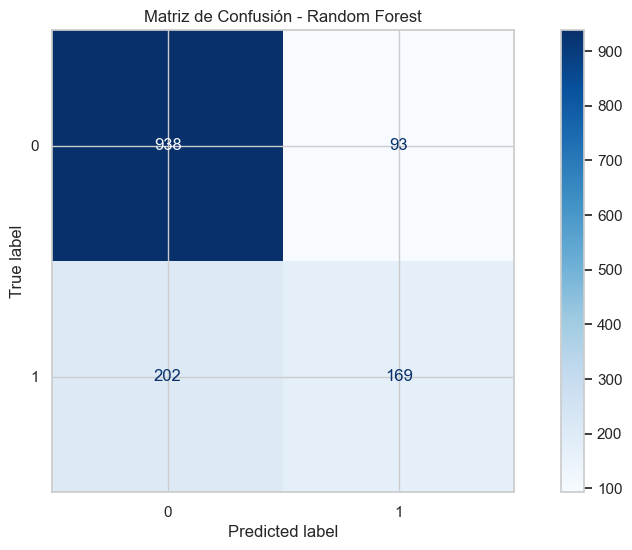

In [41]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión - Random Forest")
plt.show()

🔢 ¿Qué significan los números del gráfico?

Ell modelo fue entrenado para predecir la cancelación de clientes (Churn), donde:

0 = Cliente no canceló.

1 = Cliente sí canceló.

|                 | **Predicho 0 (No Churn)** | **Predicho 1 (Churn)** |
| --------------- | ------------------------- | ---------------------- |
| **Real 0 (No)** | **938**  → TN             | **93**   → FP          |
| **Real 1 (Sí)** | **202**  → FN             | **169**  → TP          |


📊 **Interpretación de cada valor:**

- **938 Verdaderos Negativos (TN)**

    El modelo predijo correctamente que 938 clientes no cancelarían su servicio.

- **93 Falsos Positivos (FP)**

    El modelo predijo que cancelarían, pero en realidad no lo hicieron.

    ❌ Falsas alarmas.

- **202 Falsos Negativos (FN)**

    El modelo predijo que no cancelarían, pero en realidad sí cancelaron.

    ⚠️ Muy importante en churn: estos son clientes perdidos que no se detectaron a tiempo.

- **169 Verdaderos Positivos (TP)**

    El modelo predijo correctamente que 169 clientes cancelarían.

# 🔍 6️⃣ Importancia de Variables

La importancia de una variable en Random Forest se mide por cuánto disminuye la impureza (o incertidumbre) del modelo al hacer splits con esa variable. En otras palabras, mientras más una variable ayuda a tomar decisiones correctas, más importante es para el modelo.

In [42]:
# Importancia de Variables
importances = pd.Series(rf.feature_importances_, index=X_train.columns)
importances = importances.sort_values(ascending=False)

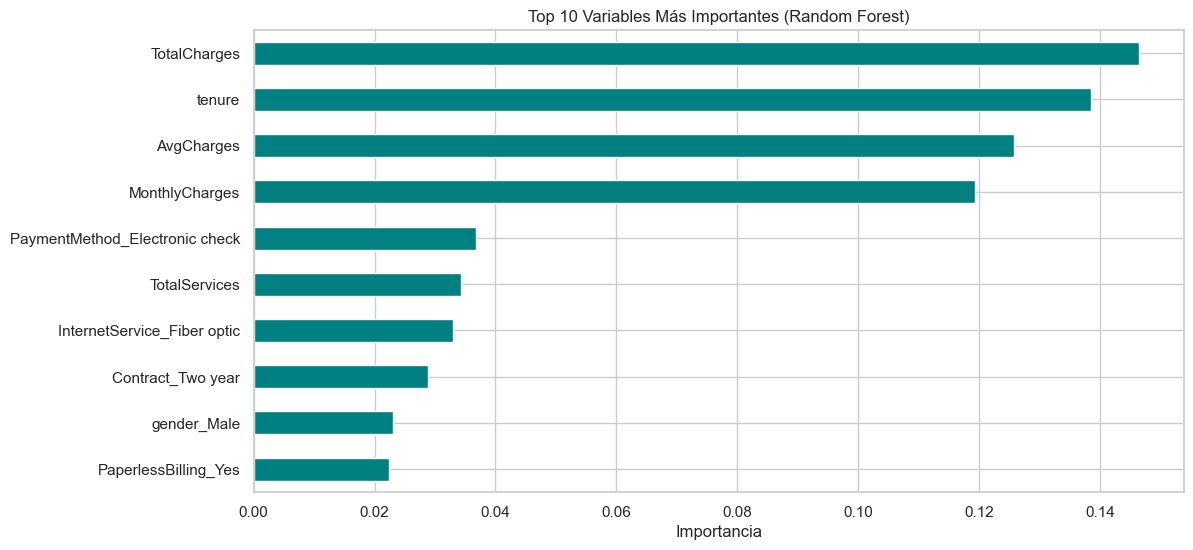

In [43]:
# Mostrar top 10 variables más importantes
importances.head(10).plot(kind='barh', color='teal')
plt.title("Top 10 Variables Más Importantes (Random Forest)")
plt.xlabel("Importancia")
plt.gca().invert_yaxis()
plt.show()

# 🔍 Interpretación variable por variable (de arriba hacia abajo):

1. **TotalCharges:**

      🔝 La más importante.

      Representa el total de dinero que el cliente ha pagado.

      Clientes con cobros acumulados bajos suelen tener menor permanencia (alta tasa de churn).

      Es una fuerte señal de cuánto ha usado el servicio el cliente.

2. **tenure:**

      Tiempo (en meses) que el cliente lleva con la empresa.

      Tenure corto suele estar relacionado con churn alto, como viste en el gráfico anterior.

3.  **AvgCharges (promedio de cargos mensuales):**

      Calculado (probablemente) como TotalCharges / tenure.

      Captura el gasto mensual medio. Ayuda a detectar si el cliente paga mucho por poco tiempo, una señal de riesgo de fuga.

4.  **MonthlyCharges:**

      Lo que el cliente paga al mes.

      Altos cargos mensuales podrían causar cancelaciones si no hay percepción de valor.

5.  **PaymentMethod_Electronic check:**

      Tipo de método de pago.

      Los pagos electrónicos pueden estar relacionados con churn más alto, posiblemente porque los clientes los usan para servicios a corto plazo.

6.  **TotalServices:**

      Cuántos servicios contrata el cliente (Internet, telefonía, streaming, etc.).

      Clientes con menos servicios contratados tienden a cancelar más rápido.

7. **InternetService_Fiber optic:**

     Tipo de servicio de Internet.

     Fibra óptica suele estar asociada a mayor churn en muchos casos por ser más costosa o por problemas técnicos.

8. **Contract_Two year:**

     Tipo de contrato.

     Contratos de dos años reducen drásticamente el churn, como viste en los modelos anteriores.

9. **gender_Male:**

    Género del cliente.

    En este modelo, ser hombre tiene una pequeña influencia, aunque en general esta variable no suele ser muy significativa, pero puede estar correlacionada con otras.

10. **PaperlessBilling_Yes:**

    Si el cliente usa facturación electrónica.

    Puede estar relacionado con mayor probabilidad de churn, tal vez porque los clientes con menos contacto físico con la empresa se sienten menos vinculados.

# 🧾 Conclusión Final – Análisis Exploratorio de Datos (EDA)

El análisis exploratorio realizado en este notebook nos ha permitido obtener una comprensión profunda y estructurada del comportamiento de los clientes, sus características y cómo se relacionan con la cancelación del servicio (variable objetivo: Churn). A través de visualizaciones claras y estadísticas descriptivas, logramos identificar patrones valiosos que sentarán las bases para un modelo predictivo más robusto y preciso.

- **Identificación de Factores Clave:** El análisis inicial reveló que el tipo de contrato, los servicios de Internet (especialmente la fibra óptica), el soporte técnico y la facturación electrónica son factores significativamente relacionados con la probabilidad de que un cliente abandone el servicio.

- **Segmentos de Riesgo:** Los clientes con contratos mensuales, aquellos con servicios de fibra óptica, y los que no tienen soporte técnico o protección de dispositivos, muestran una mayor propensión al churn.

- **Antigüedad y Cargos:** Los clientes con menor antigüedad y cargos mensuales más altos también presentan un mayor riesgo.